#  Decision Trees and Random Forests

![](https://charleshsliao.files.wordpress.com/2017/05/screen-shot-2017-05-20-at-5-58-52-pm.png?w=1088)

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Decision tree

Consider the following two-dimensional data, which has one of four class labels:

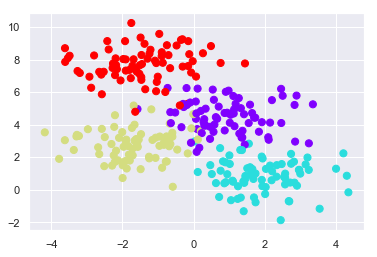

In [23]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(tree, X, y, cv=10, scoring="accuracy")
print("Average accuracy: ", scores.mean())

Average accuracy:  0.8928571428571429


A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.
This figure presents a visualization of the first four levels of a decision tree classifier for this data:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree-levels.png?raw=1)

Notice that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch.
Except for nodes that contain all of one color, at each level *every* region is again split along one of the two features.

## Visualization for Decision Tree

In [20]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    #print(xlim)
    #print(ylim)
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    print(xx)
    print(yy)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can examine what the decision tree classification looks like:

[[-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 ...
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]]
[[-2.49492551 -2.49492551 -2.49492551 ... -2.49492551 -2.49492551
  -2.49492551]
 [-2.42777559 -2.42777559 -2.42777559 ... -2.42777559 -2.42777559
  -2.42777559]
 [-2.36062566 -2.36062566 -2.36062566 ... -2.36062566 -2.36062566
  -2.36062566]
 ...
 [10.73361026 10.73361026 10.73361026 ... 10.73361026 10.73361026
  10.73361026]
 [10.80076018 10.80076018 10.80076018 ... 10.80076018 10.80076018
  10.80076018]
 [10.86791011 10.86791011 10.86791011 ... 10.86791011 10.86791011
  10.86791011]]


/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


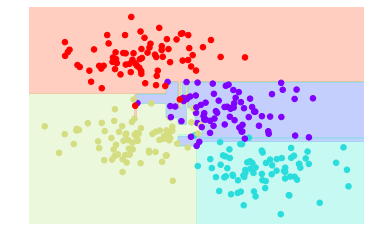

In [21]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Over-fitting and Decision trees

Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from.
Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree-overfitting.png?raw=1)

It is clear that in some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters).
The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from *both* of these trees, we might come up with a better result!

If you are running this notebook live, the following function will allow you to interactively display the fits of trees trained on a random subset of the data:

Just as using information from two trees improves our results, we might expect that using information from many trees would improve our results even further.

## Ensembles of Estimators: Random Forests

This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called *bagging*.
Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification.
An ensemble of randomized decision trees is known as a *random forest*.

This type of bagging classification can be done manually using Scikit-Learn's ``BaggingClassifier`` meta-estimator, as shown here:

[[-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 ...
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]]
[[-2.49492551 -2.49492551 -2.49492551 ... -2.49492551 -2.49492551
  -2.49492551]
 [-2.42777559 -2.42777559 -2.42777559 ... -2.42777559 -2.42777559
  -2.42777559]
 [-2.36062566 -2.36062566 -2.36062566 ... -2.36062566 -2.36062566
  -2.36062566]
 ...
 [10.73361026 10.73361026 10.73361026 ... 10.73361026 10.73361026
  10.73361026]
 [10.80076018 10.80076018 10.80076018 ... 10.80076018 10.80076018
  10.80076018]
 [10.86791011 10.86791011 10.86791011 ... 10.86791011 10.86791011
  10.86791011]]


/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


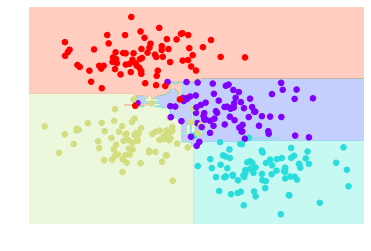

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=1000, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

In this example, we have randomized the data by fitting each estimator with a random subset of 80% of the training points.
In practice, decision trees are more effectively randomized by injecting some stochasticity in how the splits are chosen: this way all the data contributes to the fit each time, but the results of the fit still have the desired randomness.
For example, when determining which feature to split on, the randomized tree might select from among the top several features.
You can read more technical details about these randomization strategies in the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest) and references within.

In Scikit-Learn, such an optimized ensemble of randomized decision trees is implemented in the ``RandomForestClassifier`` estimator, which takes care of all the randomization automatically.
All you need to do is select a number of estimators, and it will very quickly (in parallel, if desired) fit the ensemble of trees:

[[-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 ...
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]
 [-4.62233711 -4.57501157 -4.52768603 ...  4.700794    4.74811954
   4.79544507]]
[[-2.49492551 -2.49492551 -2.49492551 ... -2.49492551 -2.49492551
  -2.49492551]
 [-2.42777559 -2.42777559 -2.42777559 ... -2.42777559 -2.42777559
  -2.42777559]
 [-2.36062566 -2.36062566 -2.36062566 ... -2.36062566 -2.36062566
  -2.36062566]
 ...
 [10.73361026 10.73361026 10.73361026 ... 10.73361026 10.73361026
  10.73361026]
 [10.80076018 10.80076018 10.80076018 ... 10.80076018 10.80076018
  10.80076018]
 [10.86791011 10.86791011 10.86791011 ... 10.86791011 10.86791011
  10.86791011]]


/Users/akr712/.pyenv/versions/jupyter3/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


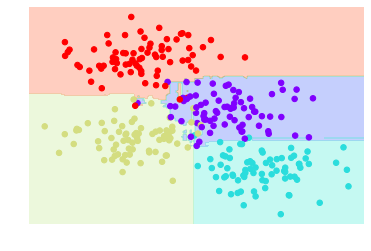

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, random_state=0)
visualize_classifier(model, X, y);

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

## Random Forest for Regression Problem

In the previous section we considered random forests within the context of classification.
Random forests can also be made to work in the case of regression (that is, continuous rather than categorical variables). The estimator to use for this is the ``RandomForestRegressor``, and the syntax is very similar to what we saw earlier.

Consider the following data, drawn from the combination of a fast and slow oscillation:

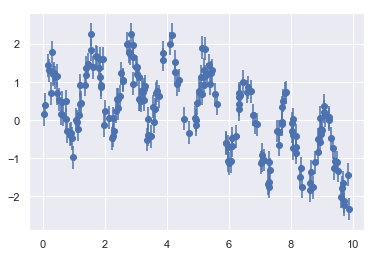

In [12]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Using the random forest regressor, we can find the best fit curve as follows:

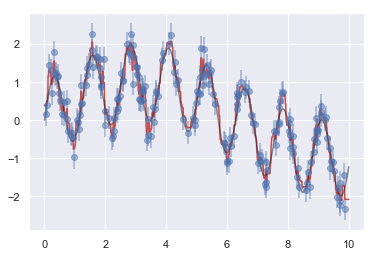

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);